### Define the function to analyze the behavioral files with 4 repititions


In [1]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

def analyze_data(name, dict_path):
    # Load data
    filename = dict_path + name
    data = scipy.io.loadmat(filename)

    beh = data['beh'][0]
    beh_df = pd.DataFrame(beh)

    num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

    overall_cond = np.zeros(num_cond)
    correct_cond = np.zeros(num_cond)
    RT_cond = np.full((num_cond, 200), np.nan)

    for _, row in beh_df.iterrows():
        for i in range(1, num_cond + 1):  # MATLAB indices start from 1
            if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
                overall_cond[i-1] += 1  # Adjust for 0-based indexing

                if row['TrialError'] == 0:
                    correct_cond[i-1] += 1
                    RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

    mean_RT = np.nanmean(RT_cond, axis=1)
    cond_performance = correct_cond / overall_cond

    # Plotting Performance
    plt.figure()
    plt.bar(range(1, num_cond+1), cond_performance, color='lightgreen', label='Match trials')  # Changed color to lightgreen
    plt.xlabel('Conditions')
    plt.ylabel('Performance')
    plt.title('Performance ' + name)

    # Change color for specific bars to blue (if you still want to differentiate them)
    plt.bar(range(9, 17), cond_performance[8:16], color='blue', label='Nonmatch trials')
    plt.bar(range(25, 33), cond_performance[24:32], color='blue')  # Assuming there are at least 32 conditions
    plt.bar(range(41, 49), cond_performance[40:48], color='blue')  # Assuming there are at least 48 conditions

    # Move legend outside the figure
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Calculate mean performance for different groups of bars
    mean_performance_1_8 = np.mean(cond_performance[:8])
    mean_performance_9_16 = np.mean(cond_performance[8:16])
    mean_performance_17_24 = np.mean(cond_performance[16:24])
    mean_performance_25_32 = np.mean(cond_performance[24:32])
    mean_performance_33_40 = np.mean(cond_performance[32:40])
    mean_performance_41_48 = np.mean(cond_performance[40:48])

    # Define the data
    data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep', 'Nonmatch_4_rep', 'Match_4_rep'],
            'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32, mean_performance_33_40, mean_performance_41_48]}


    # Create a DataFrame
    df = pd.DataFrame(data)

    # Format the 'Mean Performance' column to have only two digits after the decimal point
    df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

    print(name)
    print(df['Mean Performance'])


    # calculate mean performance based on direction of 1st cue
    # Calculate mean performance for each group
    group1 = [9, 12, 8, 7]
    group2 = [10, 11, 5, 6]
    group3 = [13, 15, 4, 2]
    group4 = [14, 16, 1, 3]

    mean_performance_group1 = np.mean([cond_performance[i-1] for i in group1])
    mean_performance_group2 = np.mean([cond_performance[i-1] for i in group2])
    mean_performance_group3 = np.mean([cond_performance[i-1] for i in group3])
    mean_performance_group4 = np.mean([cond_performance[i-1] for i in group4])

    # Print mean performances
    print(f"Performance for Cat 11_2rep (Conditions {group1}): {mean_performance_group1:.2f}")
    print(f"Performance for Cat 12_2rep (Conditions {group2}): {mean_performance_group2:.2f}")
    print(f"Performance for Cat 21_2rep (Conditions {group3}): {mean_performance_group3:.2f}")
    print(f"Performance for Cat 22_2rep (Conditions {group4}): {mean_performance_group4:.2f}")

    # calculate mean performance based on direction of 1st cue
    # Calculate mean performance for each group_3 repitition
    group1 = [17, 18, 25, 26]
    group2 = [19, 20, 27, 28]
    group3 = [21, 22, 29, 30]
    group4 = [23, 24, 31, 32]

    mean_group1_3rep = np.mean([cond_performance[i-1] for i in group1])
    mean_group2_3rep = np.mean([cond_performance[i-1] for i in group2])
    mean_group3_3rep = np.mean([cond_performance[i-1] for i in group3])
    mean_group4_3rep = np.mean([cond_performance[i-1] for i in group4])

    # Print mean performances
    print(f"Performance for Cat 11_2rep (Conditions {group1}): {mean_group1_3rep:.2f}")
    print(f"Performance for Cat 12_2rep (Conditions {group2}): {mean_group2_3rep:.2f}")
    print(f"Performance for Cat 21_2rep (Conditions {group3}): {mean_group3_3rep:.2f}")
    print(f"Performance for Cat 22_2rep (Conditions {group4}): {mean_group4_3rep:.2f}")

    # calculate mean performance based on direction of 1st cue
    # Calculate mean performance for each group_4 repitition
    group1 = [33, 34, 41, 42]
    group2 = [35, 36, 43, 44]
    group3 = [37, 38, 45, 46]
    group4 = [39, 40, 47, 48]

    mean_group1_3rep = np.mean([cond_performance[i-1] for i in group1])
    mean_group2_3rep = np.mean([cond_performance[i-1] for i in group2])
    mean_group3_3rep = np.mean([cond_performance[i-1] for i in group3])
    mean_group4_3rep = np.mean([cond_performance[i-1] for i in group4])

    # Print mean performances
    print(f"Performance for Cat 11_2rep (Conditions {group1}): {mean_group1_3rep:.2f}")
    print(f"Performance for Cat 12_2rep (Conditions {group2}): {mean_group2_3rep:.2f}")
    print(f"Performance for Cat 21_2rep (Conditions {group3}): {mean_group3_3rep:.2f}")
    print(f"Performance for Cat 22_2rep (Conditions {group4}): {mean_group4_3rep:.2f}")



    print('finished')



C:\Users\Sihai\AppData\Local\Temp\ipykernel_18668\2344038318.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer
C:\Users\Sihai\AppData\Local\Temp\ipykernel_18668\2344038318.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']
C:\Users\Sihai\AppData\Local\Temp\ipykernel_18668\2344038318.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


20231219_Sly_MMN_steps.mat
0    0.75
1    0.78
2    0.96
3    0.59
4    0.98
5    0.67
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.54
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.91
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.77
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.82
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.71
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.68
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.92
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.79
Performance for Cat 11_2rep (Conditions [33, 34, 41, 42]): 0.69
Performance for Cat 12_2rep (Conditions [35, 36, 43, 44]): 0.82
Performance for Cat 21_2rep (Conditions [37, 38, 45, 46]): 0.87
Performance for Cat 22_2rep (Conditions [39, 40, 47, 48]): 0.94
finished


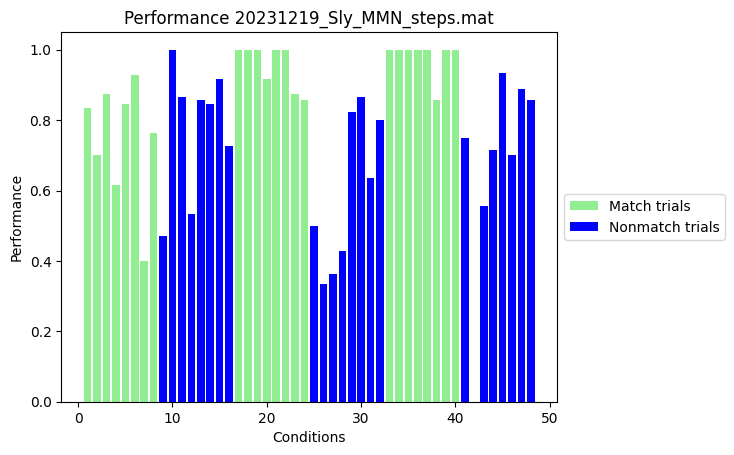

In [3]:
# Call the function
name = "20231219_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_analysis\MMN\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)